# D213 Advanced Data Analytics Performance Assessment, Task \# 2

Submitted by Ubaldo Martinez III, Sentiment Analysis Using Neural Networks, Master of Science, Data Analytics, WGU

## Table of Contents
<ul>
<li><a href="#PartA1">A1: Research Question</a></li>
<li><a href="#PartA2">A2: Objectives and Goals</a></li>
<li><a href="#PartA3">A3: Neutral Network Identification</a></li>
<li><a href="#PartB1">B1: Exploratory Data Analysis</a></li>
<li><a href="#PartB2">B2: Tokenization</a></li>
<li><a href="#PartB3">B3: Padding</a></li> 
<li><a href="#PartB4">B4: Sentiment & Activation Function</a></li>
<li><a href="#PartB5">B5: Overview of Data Preparation</a></li>
<li><a href="#PartB6">B6: Copy of Prepared Dataset</a></li>
<li><a href="#PartC1">C1: TensorFlow Model Summary</a></li>
<li><a href="#PartC2">C2: Types of Layers & Parameters</a></li>
<li><a href="#PartC3">C3: Hyperparameter Optimization & Justifications</a></li>
<li><a href="#PartD1">D1: Effects of Stopping Criteria</a></li>
<li><a href="#PartD2">D2: Training Model Visualizations</a></li>
<li><a href="#PartD3">D3: Model Performance Metrics</a></li>
<li><a href="#PartD4">D4: Trained Network Predictive Accuracy</a></li>
<li><a href="#PartE">E: Trained Network Code</a></li> 
<li><a href="#PartF">H: Network Functionality</a></li> 
<li><a href="#PartG">G: Proposed Future Actions</a></li>
<li><a href="#PartH">H: Reporting</a></li>
<li><a href="#PartI">I: Code References</a></li>
<li><a href="#PartJ">J: Source References</a></li>    
</ul>

# Part I: Research Question

<a id='PartA1'></a>
## <span style="color:green">A1: Research Question</span>

Ascertain the feasibility of employing a neural network to precisely forecast whether a customer positively or negatively recommends a product/service, relying on the textual review composed by said customer to evaluate the product/service.

<a id="#PartA2"></a>
## <span style="color:green">A2: Objectives & Goals</span>

To employ a neural network for sentiment recognition, specifically discerning whether a customer expresses a positive inclination (recommends) or a negative sentiment (not-recommend) towards a product/service based on their written review, constitutes a rather intricate process that leverages the prowess of Natural Language Processing techniques. Having left my share of positive and negative feedback for both products or services, I know each review necessitates a "like"/"dislike or "recommend"/"not-recommend" to accompany the review. This inclusion bestows a veritable "truth" value, serving as a reference against which to assess the predictions generated by a model incorporating neural networks to analyze the provided review texts.

Achieving proficiency in this sentiment analysis lays the foundation for a multitude of subsequent analyses, ranging from service reviews on a company forum to voice sentiment analysis in real-time for customer service. These endeavours encompass, on a smaller scale, the ability to parse additional communications from users concerning these products/services—be it on social media platforms or elsewhere—to identify common factors and key phrases associated with reviews. Moreover, there exists the tantalizing possibility of elevating this data into a recommendation engine, unlocking its potential to enhance user experience and offer valuable suggestions.

<a id="#PartA3"></a>
## <span style="color:green">A3: Neural Network Identification</span>

Recurrent Neural Networks (RNNs) represent a class of neural networks extensively employed for handling text data and Natural Language Processing (NLP) challenges. The distinctive attribute of an RNN lies in its recurrent connection with itself, allowing it to traverse through sequential information encoded in the input data, thus bestowing context upon the subsequent flow of information. This contextual awareness holds utmost significance in text analysis since words presented in a sequence impart meaning and relevance to those that ensue. 


# Part II: Data Preparation

<a id="#PartB1"></a>
## <span style="color:green">B1: Exploratory Data Analysis</span>

The raw dataset is a combination of three seperate text files from imdb.com, amazon.com, and yelp.com. Each dataset contains 500 positive and 500 negative sentences with no neutral sentences. The format of the datasets consist of strings for each review, with the first value representing the "review" as a sentence and the second value representing the score as either 1 (for positive) or 0 (for negative).
```
Kotzias,Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. 
    https://doi.org/10.24432/C57604.
```

In [31]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.models import Sequential

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_colwidth', 1000)

plt.rc("font", size=14)
plt.rcParams['font.family'] = 'Liberation Sans, sans-serif'
plt.rcParams['figure.figsize'] = (12,8)
plt.style.use("dark_background")

# Warnings
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')



os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

[nltk_data] Downloading package punkt to /home/crassus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/crassus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/crassus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Import & Combine Three Datasets Into One
amazon = './Data/amazon_cells_labelled.txt'
imdb = './Data/imdb_labelled.txt'
yelp = './Data/yelp_labelled.txt'

column_names = ['text', 'recommend']
a_df = pd.read_csv(amazon, sep='\t', names=column_names, header=None)
i_df = pd.read_csv(imdb, sep='\t', names=column_names, header=None)
y_df = pd.read_csv(yelp, sep='\t', names=column_names, header=None)

df = pd.concat([a_df, i_df, y_df])

df_raw = df.reset_index(drop=True)

df_raw.tail()

,text,recommend
2743,I think food should have flavor and texture and both were lacking.,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go back.,0
2746,"The whole experience was underwhelming, and I think we'll just go to Ninja Sushi next time.",0
2747,"Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.",0


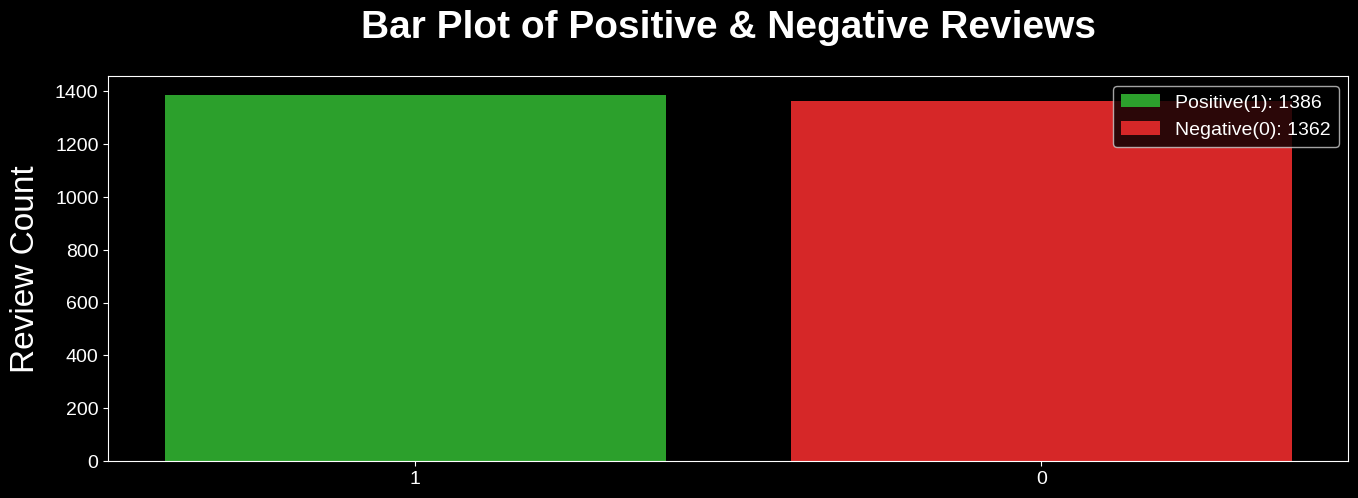

In [33]:
# Generate A Bar Plot To Get A Visualization Of The Dataset
fig, ax = plt.subplots(figsize=(16,5))

rating = ['1', '0']
counts = pd.value_counts(df_raw['recommend'])
bar_labels = ['Positive(1): {}'.format(len(df_raw[df_raw['recommend']==1])), 'Negative(0): {}'.format(len(df_raw[df_raw['recommend']==0]))]
bar_colors = ['tab:green', 'tab:red']

ax.bar(rating, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Review Count', fontsize=24, color='white', labelpad=10)
ax.set_title('Bar Plot of Positive & Negative Reviews', fontweight='bold', fontsize=28, color='white', y=1.05, pad=14, horizontalalignment='center')
ax.legend(bar_labels)

plt.show()

#### First Tokenization

In [34]:
t_recs = df_raw['recommend']
r_recs = t_recs[~pd.isnull(t_recs)]

# Array Length After Ommitting NaN
print(f"After Omitting NaN, {len(r_recs)} Recommendations Exist In Array.")

# Verify
print(r_recs)

# Verify Dataframe
print(np.unique(r_recs, return_counts=True))

After Omitting NaN, 2748 Recommendations Exist In Array.
0       0
1       1
2       1
3       0
4       1
       ..
2743    0
2744    0
2745    0
2746    0
2747    0
Name: recommend, Length: 2748, dtype: int64
(array([0, 1]), array([1362, 1386]))


In [35]:
recommend = df_raw['text']

# Utilize List Comprehension To Iterate Through Each Review To Generate Sentence Tokens & Convert To Lowercase
sentence_tokens = [sent_tokenize(review.lower()) for review in recommend]
print(f"After Tokenization By Sentence, {len(sentence_tokens)} Elements Exist In Array.")

# Sample Of List
sentence_tokens[10]

After Tokenization By Sentence, 2748 Elements Exist In Array.


['and the sound quality is great.']

In [36]:
# Generate List Of Stop Words To Exclude From Reviews In Addition To Common Observed Words
my_stop_words = stopwords.words('english') + list(string.punctuation) + ["``", "''","...", "....", ".....", "ca", "wo", "'s", "'ing", "'ll", "'re"]

# Length Of Stop Words List To Review
print(f"Length Of Stop Words List, {len(my_stop_words)}.")
my_stop_words[0:10]

Length Of Stop Words List, 222.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [37]:
# To Prevent Bad Results, Negating Words Are Kept In Analysis
negating_words = ['but', 'not', "don't", "aren't", "couldn't", "doesn't", "hadn't", "hasn't", "haven't", 
                  "isn't", "shouldn't", "wouldn't"]

# Exclude List Of Negating Words From Stop Words List
for word in negating_words:
    my_stop_words.remove(word)

# Verify Updated List Of Stop Words
print(f"Updated List Of Stop Words Omitting Negations Is: {len(my_stop_words)} Elements Long.")
my_stop_words[0:10]

Updated List Of Stop Words Omitting Negations Is: 210 Elements Long.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [38]:
# Detect Non-ASCII Characters & Omit Strings Containing Any Such Characters
def only_ascii_chars(pass_string):

    # Compile Lowercase ASCII Letters & Punctuation As Acceptable Input
    char_set = string.ascii_lowercase + string.punctuation + string.digits

    # True = All Characters In Specified 'char_set' 
    # False = Any Characters Not In Specified 'char_set'
    return all((True if x in char_set else False for x in pass_string))

# Initialize Empty List To Store Word Tokens
word_tokens = []

# Iterate Through Sentence Tokens
for sentences in sentence_tokens:

    # Initialize Temporary List To Store Words Once Processed
    t_list = []

    # For 1-Dimension Sentence Tokens
    if (len(sentences)) == 1:

        # Generate List Of Word Tokens From Sentence Token
        words_in_sentence = word_tokenize(sentences[0])

        # Handling Specific Words
        for word in words_in_sentence:

            # Replace Faux-Word "n't" With "not"
            if word == "n't":
                word = "not"
            
            # Check The Presence Of Non-ASCII Characters, If Present Skip To Next Word
            if not only_ascii_chars(word):
                    continue
            
            # Add Word To Temporary List Of Word Tokens
            t_list.append(word)
    else:
        # 2-Dimension Sentence Tokens, Determine Limit Of Second Dimension
        num_sentences = len(sentences)

        # Iterate Through 2-Dimension
        for i in range(0, num_sentences):

            # Generate List Of Word Tokens From Sentence Token
            words_in_sentence = word_tokenize(sentences[i])

            # Handling Specific Words
            for word in words_in_sentence:

                # Replace Faux-Word "n't" With "not"
                if word == "n't":
                    word = "not"

                # Check The Presence Of Non-ASCII Characters, If Present Skip To Next Word
                if not only_ascii_chars(word):
                    continue

                # Add Word To Temporary List Of Word Tokens
                t_list.append(word)

    # Add A Placeholder Value If Temporary List Finishes Empty
    if len(t_list) == 0:
        t_list = ['empty']

    # Iterate Through Words In Temporary List & Verify Word Not In `my_stop_words' List
    trim_words = [word for word in t_list if word not in my_stop_words]

    # Append Words To `word_tokens` List
    word_tokens.append(trim_words)

# Iterate Through First 40 Indexes (Reviews) & Print Word Tokens For Each Index
i = 0 
for words in word_tokens[41:90]:
    i += 1 
    print(f"Token Index {i}: {words}")

Token Index 1: ['not', 'impressed', 'product']
Token Index 2: ['nice', 'headset', 'priced', 'right']
Token Index 3: ['hear', 'garbage', 'audio']
Token Index 4: ['excellent', 'bluetooth', 'headset']
Token Index 5: ['features', 'want']
Token Index 6: ['right', 'mind', 'gon', 'na', 'buy', 'battery']
Token Index 7: ['arguing', 'verizon', 'regarding', 'dropped', 'calls', 'returned', 'phones', 'two', 'days']
Token Index 8: ['case', 'seems', 'well', 'made']
Token Index 9: ['disappointed', 'battery']
Token Index 10: ['not', 'loud', 'enough', 'not', 'turn', 'like']
Token Index 11: ['good', 'protection', 'not', 'make', 'phone', 'bulky']
Token Index 12: ['usable', 'keyboard', 'actually', 'turns', 'pda', 'real-world', 'useful', 'machine', 'instead', 'neat', 'gadget']
Token Index 13: ['phone', 'pretty', 'sturdy', "'ve", 'never', 'large', 'problems']
Token Index 14: ['love', 'thing']
Token Index 15: ['everything', 'fine', 'reasonable', 'price', 'i.e']
Token Index 16: ['disappointed']
Token Index 17:

In [39]:
# Generate Information For Word Tokens & Compile A Pot Of All Words
i = 0 
pot_of_words = []
max_review_length = 0

# Iterate Through Each 'word_tokens' List (1 List Per Review)
for words in word_tokens:

    # Max Length Of A Review
    if len(words) > max_review_length:
        max_review_length = len(words)

        # Update On Finding New 'Longest' Review
        print(f"New Max Review Length Found: Index {i} Contains {max_review_length} Word Tokens.")

    for w in words:
        pot_of_words.append(w)
    i += 1

unique_words = set(pot_of_words)
num_uniq_words = len(unique_words)

# Total # Of Word Tokens In Dataset / # of Unique Word Tokens / Longest Review
print(f"\nTotal # Of Words: {len(pot_of_words)} \nTotal # Of Unique Words: {num_uniq_words} (Vocabulary) \nMaximum # Of Words In Any Single Review: {max_review_length}.")

New Max Review Length Found: Index 0 Contains 6 Word Tokens.
New Max Review Length Found: Index 3 Contains 7 Word Tokens.
New Max Review Length Found: Index 5 Contains 8 Word Tokens.
New Max Review Length Found: Index 6 Contains 10 Word Tokens.
New Max Review Length Found: Index 12 Contains 12 Word Tokens.
New Max Review Length Found: Index 35 Contains 13 Word Tokens.
New Max Review Length Found: Index 65 Contains 15 Word Tokens.
New Max Review Length Found: Index 112 Contains 17 Word Tokens.
New Max Review Length Found: Index 1002 Contains 18 Word Tokens.
New Max Review Length Found: Index 1019 Contains 506 Word Tokens.
New Max Review Length Found: Index 1136 Contains 804 Word Tokens.

Total # Of Words: 19394 
Total # Of Unique Words: 5194 (Vocabulary) 
Maximum # Of Words In Any Single Review: 804.


In [40]:
# Review Index '1019' For Legitimacy
word_tokens[1019][:10]

['structure',
 'film',
 'easily',
 'tightly',
 'constructed',
 'history',
 'cinema',
 '1',
 'think',
 'film']

In [41]:
# Review Index '1136' For Legitimacy
word_tokens[1136][:10]

['fact',
 'hard',
 'remember',
 'part',
 'ray',
 'charles',
 'acted',
 'not',
 'played',
 'man']

In [42]:
# Generate New Dataframe To Provide A Copy With Report
# Initialize An Empty List & Counter To Fill With Dictionaries
rows_list = []
i = 0

# Iterate Through Each Index Of Clean 'word_tokens'
for i in range(0, len(word_tokens)):

    # Generate Temporary Dictionary & String
    t_dict = {}
    t_string = ""

    # Extract Each Word From Indexed 'word_tokens' & Add To 't_string'
    for word in word_tokens[i]:
        t_string = t_string + word + " "

    # Update Dictionary With Key-Value Pairs
    t_dict.update({"recommend" : r_recs[i]})
    t_dict.update({"review" : t_string})

    # Add Temporary Dictionary To List Of Dictionaries
    rows_list.append(t_dict)

    # Iterate Counter
    i += 1

# Generate Dataframe From List Of Dictionaries
df_final = pd.DataFrame(rows_list)
df_final

,recommend,review
0,0,way plug us unless go converter
1,1,good case excellent value
2,1,great jawbone
3,0,tied charger conversations lasting 45 minutes.major problems
4,1,mic great
...,...,...
2743,0,think food flavor texture lacking
2744,0,appetite instantly gone
2745,0,overall not impressed would not go back
2746,0,whole experience underwhelming think go ninja sushi next time


In [43]:
# Verify No Nulls Exist In Dataset
df_final.isnull().any()

recommend    False
review       False
dtype: bool

In [44]:
# Verify No 'empty' Values Exist In Dataset
df_final[df_final['review'] == "empty"]

,recommend,review


Throughout the iterative process of preparing and skillfully managing the data via diverse tokenization procedures, I discerned certain aspects about the data that came to light after displaying all rows. Amidst the review data, a few entries contained Spanish words or phrases devoid of ASCII characters and punctuation. Instead of grappling with the complexities of translating them into English, I devised a function named `only_ascii_chars()`. During the iteration process, this function effectively assessed each word and identified the presence of any non-ASCII characters. Whenever such characters were encountered, the entire word was promptly disregarded from further consideration. 

The absence of emojis fashioned from characters and punctuation, as well as Unicode representations, in the reviews may stem from the raw data having undergone an initial "cleaning" process at the source. However, during my analysis, I did encounter a substantial number of phrases consisting of "5 star" or "5 stars" within sentences. To accommodate these expressions effectively, I judiciously converted the numeric representation to textual, thereby preserving their valuable contribution in the reviews.

Following tokenization and the removal of stopwords from the dataset, the complete corpus of review texts comprised of 19,394 words. Among these words, only 5,194 were found to be distinct. It is worth mentioning that no stemming or lemmatization was performed to further reduce the vocabulary from this count of 5,194 unique words. The decision to avoid stemming was due to the possibility of generating non-words, where words like "house" and "housing" would both be truncated to "hous." Likewise, lemmatization was bypassed due to its dependence on context and specificity in addressing words to be lemmatized. Given the nature of the data, which encompasses various products and services, applying stemming or lemmatization appeared problematic, as it might inadvertently merge distinct words with different meanings.

The maximum sequence length was established by identifying the longest review in the dataset, based on the number of detected words. After iterating through each `word_tokens` list, reviews were carefully examined to ensure their legitimacy and to detect any instances of "spam" (i.e., the repetitive posting of the same set of words or sentiment). Upon thorough verification, it was determined that the longest review encompassed 804 words (as observed in Cell 59) following tokenization and stopwords removal. Although the majority of reviews were shorter than this, reviews with 804 words are not uncommon. Importantly, the length of a review does not inherently signify its superiority over shorter ones; hence, no trimming of reviews was carried out.

- Vocabulary Size: 5194
- Word Embedding Length: 804

<a id="#PartB2"></a>
## <span style="color:green">B2: Tokenization</span>

The original three source files all consisted of a long string as the corresponding value for "review", one of two keys in the dictionary. To facilitate sentiment analysis, it was imperative to disintegrate each review into individual words, enabling the assignment of appropriate weights to each concept concerning the recommendation or non-recommendation of a product or service. For this purpose, the NLTK package's `sent_tokenize()` function was employed to segment each review into a list of sentences. Subsequently, the `word_tokenize()` function was utilized to further divide each sentence into a list of words. By employing this tokenization process, every sentence was meticulously deconstructed into its constituent words. To refine the data, NLTK's `stopwords` list was employed, enabling the removal of most punctuation marks and "stopwords"—words that often bear little significance to the sentiment of a sentence. This tokenization procedure was executed in Cells 55 through 58 of the preceding analysis.

The second tokenization process involves breaking down all the reviews into their word tokens for data preparation. TensorFlow demands that data should be represented numerically rather than as strings. To satisfy this requirement, the `Tokenizer()` function from the TensorFlow package was employed. The Tokenizer was fitted to the training dataset, and the `fit_on_index()` method was used to generate a word index, converting each word in the training set's vocabulary into a corresponding integer representation.

In [45]:
# 'X' Represents The Lists Of Words In Each Review, Utilized For Making Predictions Based On The Context
X = df_final['review']

# 'y' Represents Recommending Or Not Recommending A Product/Service
y = df_final['recommend']

training_size = 0.7

# Split Training Dataset
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, train_size=training_size, random_state = 369)

# Split Validation & Testing Dataset
X_valid, X_test, y_valid, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state = 369)

# Verify that our results look as expected by shape
print(f"Training Shape    X: {X_train.shape[0]}  Y: {y_train.shape[0]}")
print(f"Validation Shape  X: {X_valid.shape[0]}   Y: {y_valid.shape[0]}")
print(f"Testing Shape     X: {X_test.shape[0]}   Y: {y_test.shape[0]}")

Training Shape    X: 1923  Y: 1923
Validation Shape  X: 412   Y: 412
Testing Shape     X: 413   Y: 413


The dataset is divided into three distinct subsets: the training, validation, and testing datasets. The training dataset is used for constructing and fitting our model, while the validation dataset serves as a test set to fine-tune hyperparameters. The testing dataset, on the other hand, is employed to evaluate the final tuned model's performance.

Given the relatively small size of the dataset, a split ratio of 70:30 was adopted, allocating 70% of the data to the training set and the remaining 30% for validation and testing purposes. To accomplish this, the `train_test_split` function was utilized twice. Initially, it was employed to partition the original dataset into the training subset, and then the remaining portion of the dataset was subjected to a second `train_test_split` operation to obtain both the validation and testing subsets, each containing 15% of the initial dataset.

In [84]:
# Tokenize Words To Numbers
tokenizer = Tokenizer(num_words=5250, lower=False)
tokenizer.fit_on_texts(X_train)

tt_list = []
# Verify Word Index Of Tokenizer After Fitting
word_index_size = len(tokenizer.word_index) + 1
print(f"Word Index: {word_index_size} Elements Long")

# Hide To Not Display 
# tokenizer.word_index

Word Index: 4188 Elements Long


In [81]:
# Verify Vocabulary Size
word_index_size

4188

<a id="#PartB3"></a>
## <span style="color:green">B3: Padding</span>

In [18]:
# Generate Integer Sequences
X_train_encoded_reviews = tokenizer.texts_to_sequences(X_train)

# Implement Padding To Each Review
X_train_padded_reviews = pad_sequences(X_train_encoded_reviews, max_review_length, padding='post')
print(f"Shape Of Padded Reviews Within Training Dataset: {X_train_padded_reviews.shape}")
print(X_train_padded_reviews)

Shape Of Padded Reviews Within Training Dataset: (1923, 804)
[[  28   30   66 ...    0    0    0]
 [  94   14 1707 ...    0    0    0]
 [ 747  199 1708 ...    0    0    0]
 ...
 [ 191   10    0 ...    0    0    0]
 [  87  331   93 ...    0    0    0]
 [   1 1488  557 ...    0    0    0]]


In [19]:
# Generate Integer Sequences
X_valid_encoded_reviews = tokenizer.texts_to_sequences(X_valid)

# Implement Padding To Each Review
X_valid_padded_reviews = pad_sequences(X_valid_encoded_reviews, max_review_length, padding='post')
print(f"Shape Of Padded Reviews Within Validation Dataset: {X_valid_padded_reviews.shape}")
print(X_valid_padded_reviews)

Shape Of Padded Reviews Within Validation Dataset: (412, 804)
[[   1   43   93 ...    0    0    0]
 [  24  287 3832 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [  13  571  702 ...    0    0    0]
 [  15 3497    0 ...    0    0    0]
 [  13  124  337 ...    0    0    0]]


In [20]:
# Generate Integer Sequences
X_test_encoded_reviews = tokenizer.texts_to_sequences(X_test)

# Implement Padding To Each Review
X_test_padded_reviews = pad_sequences(X_test_encoded_reviews, max_review_length, padding='post')
print(f"Shape Of Padded Reviews Within Testing Dataset: {X_test_padded_reviews.shape}")
print(X_test_padded_reviews)

Shape Of Padded Reviews Within Testing Dataset: (413, 804)
[[  23 3941  726 ...    0    0    0]
 [   1  639  238 ...    0    0    0]
 [   3  205 1282 ...    0    0    0]
 ...
 [  18  108   76 ...    0    0    0]
 [   2   15  678 ...    0    0    0]
 [  17  203  621 ...    0    0    0]]


After the data has been divided into training, test, and validation sets, it is further processed by padding it to match the shape that the model expects. In this particular case, each review is padded to a length of 804 words, which aligns with the length of the longest review after the tokenization process. Padding, if needed, occurs at the end of the review. This is evident in the aforementioned selections where the trailing "words" are represented as zeroes, indicating that those specific reviews did not originally contain 804 words and required padding to reach the maximum length.

<a id="#PartB4"></a>
## <span style="color:green">B4: Sentiment & Activation Function</span>

There exist two (2) distinct sentiment categories: positive sentiment is represented by the integer value 1, while negative sentiment is denoted by the integer value 0.

The chosen activation function employed in the model is 'sigmoid'. The sigmoid function serves as a straightforward variation of the softmax multi-classification function. By accepting real numbers as input, the sigmoid function generates an output value ranging between 0 and 1. Consequently, the output approaches 1 as the input value increases.

<a id="#PartB5"></a>
## <span style="color:green">B5: Overview of Data Preparation</span>

- Import required packages and download additional data for NLTK operations.

- Import datasets from Amazon, Yelp & IMDB and combine into a dataframe labeled as `df_raw`.

- Generate a pandas dataframe to analyze the context within the reviews.

- Generate bar plot to visualize the value counts of positive & negative reviews.

- Verified the column `text` consisting of reviews didn't have null values using `pd.isnull`

- Perform **First Tokenization** by utilizing `sent_tokenize()` on each review to generate tokenized sentences & convert all elements to lowercase. 

- Create a custom list of stopwords for omission from the dataset consisting of downloaded stopwords from MLTK, punctuation and other observed chacter patterns for omission from the dataset. 

- Exclude negating words from the stopwords list which are important for sentiment analysis. An example of a common and frequent negating word is `not`, it holds weight by contributing a valuable distinction between a negative ("not recommend") and ("recommend") positive review.

- Navigate through every element yielded by the previous 'sent_tokenize()' procedure. Proceed with each word in said element, excluding non-ASCII characters and stopwords occurrences. Assemble the filtered words into a comprehensive collection, forming a list of lists where each review text constitutes a list of tokenized words. Take a glimpse at the initial 40 elements.

- Generate a report of the word tokens showing number of words in the dataset, number of unique words in the dataset (vocabulary), and the maximum length in number of words in any review.

- Ensure the authenticity of lengthy reviews and avoid them being flooded with repetitive vocabulary spam. If any adjustments are required for the reviews, the previous process will be reiterated until all illegitimate reviews have been eliminated.

- Generate a new dataframe with all rows, containing only the two columns of recommended and review_text. 

- Verify no nulls exists in either column of the dataframe and if any of the reviews contain 'empty' as a placeholder. 

- Prepare the training, validation, and testing datasets from the final data produced in the previous step. The training dataset consist of 70% of the data, both the validation and testing datasets consist of 15% for a total of 30% between the two. 

- Perform **Second Tokenization** by utilitzing `Tokenizer()` to the training dataset. 

- Ensure proper alignment of the training, validation, and testing datasets, padding them appropriately to conform to the expected shape, thereby facilitating seamless interaction with the model.

<a id="#PartB6"></a>
## <span style="color:green">B6: Copy of Prepared Dataset</span>

In [21]:
# Export Clean Data Frame To CSV
df_final.to_csv('Data/task2_clean.csv')

# Part III: Network Architecture

<a id="#PartC1"></a>
## <span style="color:green">C1: TensorFlow Model Summary</span>

In [22]:
# Instantiate A Sequential Model
model = Sequential()
model.add(Embedding(input_dim = word_index_size, output_dim = 128, input_length = max_review_length))
model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 804, 128)          536064    
                                                                 
 flatten (Flatten)           (None, 102912)            0         
                                                                 
 dense (Dense)               (None, 64)                6586432   
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 7124609 (27.18 MB)
Trainable params: 7124609 (27.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


<a id="#PartC2"></a>
## <span style="color:green">C2: Types of Layers & Parameters</span>

The structure of this model is sequential in nature, comprised of a five layers. Initiating the design is an Embedding layer, entrusted with the task of deciphering a colossal reservoir of data, thousands of rows in length and spanning across 804 entities. This Embedding layer operates as a sophisticated rendition of one-hot encoding, employing actual values as opposed to binary digits to represent our linguistic data in a way that condenses dimensionality. Though seemingly paradoxical, considering its stature as the most voluminous layer, housing 536,064 parameters, the rationale behind this becomes evident when delving deeper into the mechanics. The input dimension of this layer is a product of the length of the word index, amounting to 4188 entries. This index is funneled into this layer and constitutes the vocabulary it accommodates. It is then multiplied by the vector length assigned to each word, tallying to 128, which manifests as the output dimension of the layer.

The model's second stratum is a mere Flatten layer, serving to transform multi-dimensional input data into a singular dimension. Fundamentally, this ensures seamless compatibility with the subsequent Dense layers awaiting further down the structural hierarchy. This layer, devoid of any parameters, functions purely to morph data into a more tractable format, forgoing the process of weighing inputs and generating response outputs typical of other layers. Contrasting with the Embedding layer that generates a two-dimensional output of 804 by 128, the Flatten layer transforms this into a singular dimension, amassing a total of 102,912 (calculated by multiplying 804 with 128).

The model's third tier is a Dense layer, incorporating 64 nodes and utilizing the ReLu activation function. This layer undertakes the task of condensing the sprawling data shape into a more compact form, in alignment with our aim of converging to a binary output for the entire model. In this transformation, the output is whittled down from a single dimension of 102,912 elements to a modest 64 elements, managing an imposing 6,586,432 parameters in the process. This count represents the number of outputs (64) multiplied by the input derived from the Flatten layer (102,912), with an additional output cycle added.

The fourth echelon of the model presents yet another Dense layer, this time composed of 32 nodes and again employing the ReLu activation function. This layer continues the refinement process, further curating potential outcomes from the initial input, steering it towards our ultimate singular output. This layer holds a modest 2080 parameters, equating to the number of outputs (32) in conjunction with the input from the preceding Dense layer (64), supplemented by one additional output cycle.

The final stratum of the model is a Dense layer, composed of a singular node and employing the sigmoid activation function. This layer encapsulates the ultimate output of the model: a solitary value which will either signify 1 (recommendation of a product or service) or 0 (non-recommendation of a product or service). This layer is characterized by 33 parameters, which once more corresponds to the number of outputs (1) multiplied by the input drawn from the previous Dense layer (32), enhanced by an additional output iteration.

In [23]:
early_stop_check = EarlyStopping(monitor= 'val_accuracy', patience=3)

<a id="#PartC3"></a>
## <span style="color:green">C3: Hyperparameter Optimization & Justifications</span>

In the model's triad of Dense layers, both the ReLU (Rectified LInear Unit) and sigmoid activation functions were employed. ReLU has carved out its standing as the industry standard, lauded for its stellar performance, such that it essentially serves as the "default" unless specific circumstances warrant the use of an alternative. Given the commendable performance of the model, there was no impetus for me to explore other alternatives. The requirement of a binary outcome, either a 0 or 1, necessitated the use of the sigmoid function for the final Dense layer.

The quantification of nodes per layer, previously elaborated upon in section C2, provides a detailed perspective on the architecture of the network. The Embedding layer, providing an output size of 128, can be construed as possessing 128 nodes. The Flatten layer, however, functions more as a "pass-through", altering the data form to facilitate its processing by subsequent nodes, and as such isn't typically represented as a node.

The triad of Dense layers that follow each house a different quantity of nodes: 64, 32, and 1, respectively. These nodes, residing in the hidden layers, gradually refine the expansive initial input—a single review composed of 808 "words"—to culminate in a singular binary output of either 1 or 0.

The model employs binary cross entropy as its loss function, an apt choice given its focus on a classification problem as opposed to regression. This implies that the model is discerning a binary outcome (1 or 0), wherein for each 'X' value, the prediction is either entirely accurate or wholly incorrect, a stark contrast to regression problems which estimate values that could exhibit varying degrees of accuracy.

The "Adam" optimizer was chosen due to its excellent efficiency and high performance, analogous to the choice of ReLU as an activation function. Regarded as an industry standard, deviations from Adam are generally considered only when specific conditions warrant such a move. The exemplary performance of the model provided no incentive to explore alternative optimizers.

The cessation criterion for the model hinges on validation accuracy. The validation set essentially functions as a preliminary testing ground for the training data, ensuring that the authentic testing data remains untainted by the model. Assessing the model based on the loss or accuracy of the training data inadvertently promotes overfitting, a scenario which is less desirable when the model's true proficiency lies in its ability to manage fresh data that has not been included in its training set.

The model's evaluation metric hinges on accuracy within the training set. The model is calibrated to optimize fit with the training data, striving to enhance the precision of its predictions. Thus, the model endeavors to improve its adeptness in utilizing the training set, and the emphasis on validation accuracy as a stopping criterion ensures this refinement doesn't compromise performance on the validation set.

# Part IV: Model Evaluation

<a id="#PartD1"></a>
## <span style="color:green">D1: Effects of Stopping Criteria</span>

In [24]:
results = model.fit(X_train_padded_reviews, y_train, validation_data= (X_valid_padded_reviews, y_valid), epochs=12, callbacks=early_stop_check)

Epoch 1/12
61/61 [==============================] - 16s 233ms/step - loss: 0.7495 - accuracy: 0.5003 - val_loss: 0.6909 - val_accuracy: 0.5267
Epoch 2/12
61/61 [==============================] - 13s 209ms/step - loss: 0.6424 - accuracy: 0.6765 - val_loss: 0.5929 - val_accuracy: 0.6942
Epoch 3/12
61/61 [==============================] - 13s 212ms/step - loss: 0.3723 - accuracy: 0.9080 - val_loss: 0.4243 - val_accuracy: 0.7816
Epoch 4/12
61/61 [==============================] - 13s 218ms/step - loss: 0.1348 - accuracy: 0.9641 - val_loss: 0.4844 - val_accuracy: 0.7937
Epoch 5/12
61/61 [==============================] - 14s 237ms/step - loss: 0.0576 - accuracy: 0.9844 - val_loss: 0.5035 - val_accuracy: 0.7937
Epoch 6/12
61/61 [==============================] - 14s 236ms/step - loss: 0.0300 - accuracy: 0.9938 - val_loss: 0.5681 - val_accuracy: 0.7646
Epoch 7/12
61/61 [==============================] - 14s 224ms/step - loss: 0.0174 - accuracy: 0.9969 - val_loss: 0.5839 - val_accuracy: 0.7791

Within the training process of the illustrated model, we observe the termination of training at epoch 8, instigated by the early stopping mechanism. Validation accuracy will cease upon a demonstrated triad of successive declining performances or until reaching preset maximum number of iterations. Given epoch 4 exhibited the highest accuracy, this specific network configuration will be utilized by the model for test data processing.

<a id="#PartD2"></a>
## <span style="color:green">D2: Training Model Visualizations</span>

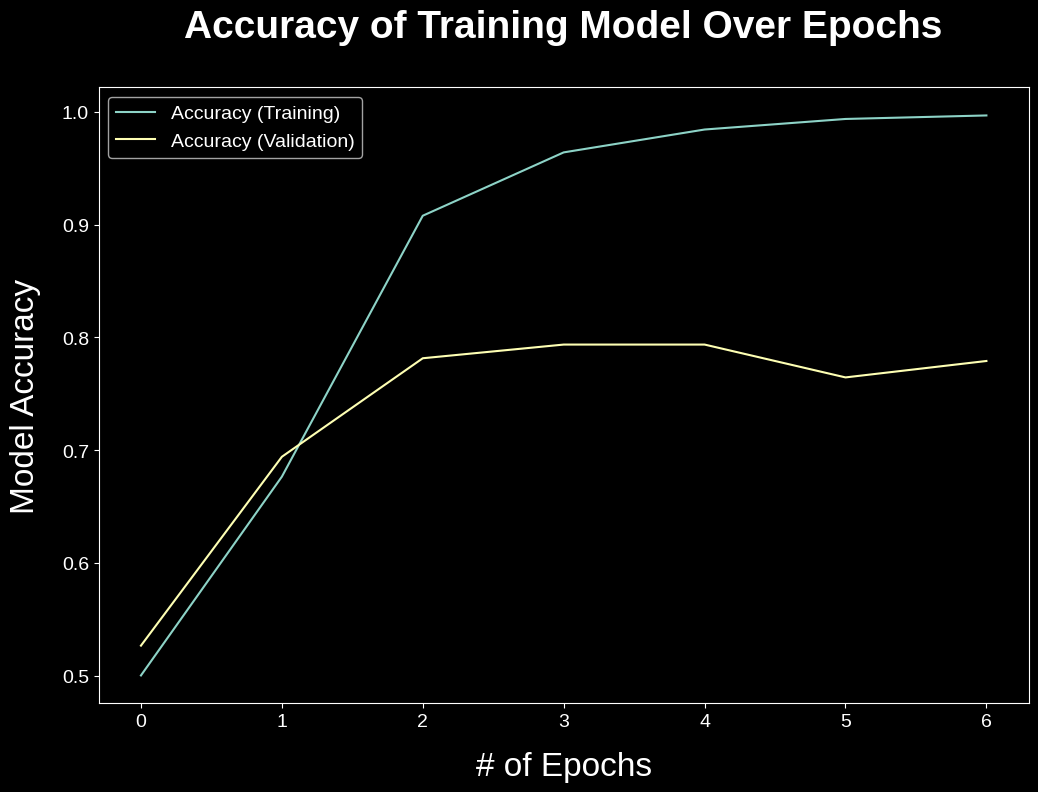

In [25]:
plt.figure(figsize = [12,8])

# Customize Graph
plt.title("Accuracy of Training Model Over Epochs", fontweight='bold', fontsize=28, color='white', y=1.05, 
              pad=14, horizontalalignment='center')
plt.xlabel("# of Epochs", fontsize=24, color='white', labelpad=15)
plt.ylabel("Model Accuracy", fontsize=24, color='white', labelpad=15)

# Plot Accuracy
plt.plot(results.history['accuracy'], label= "Accuracy (Training)")
plt.plot(results.history['val_accuracy'], label= "Accuracy (Validation)")
plt.legend()
plt.show()

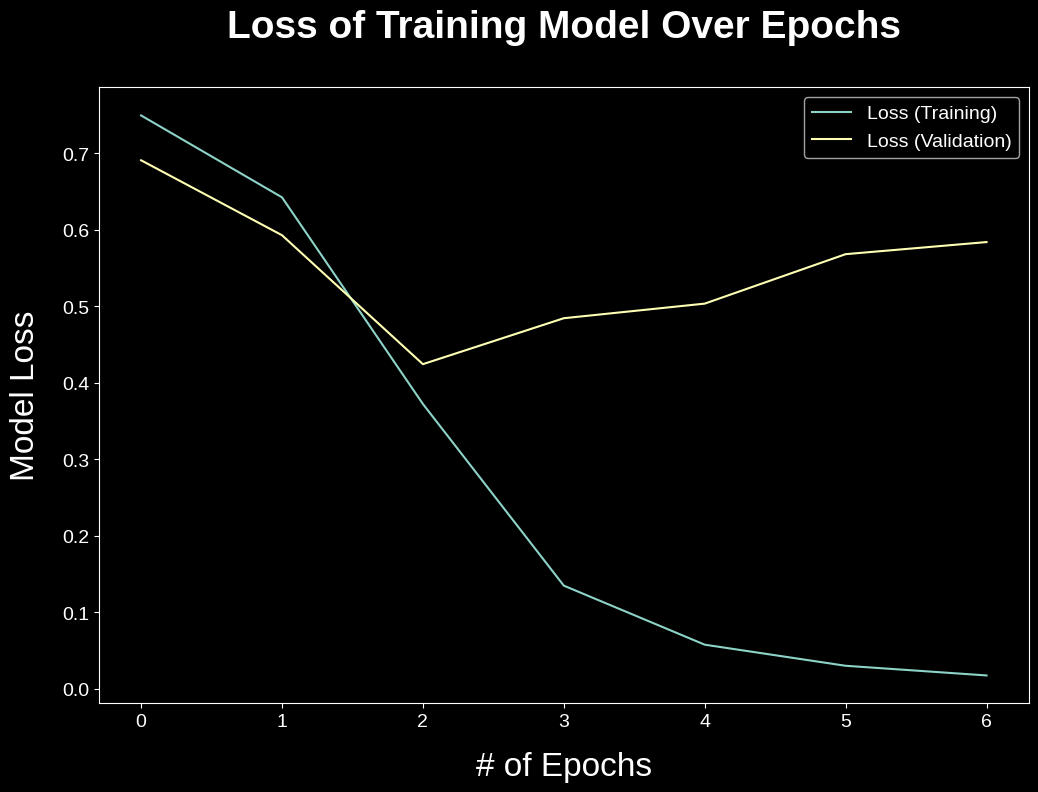

In [26]:
plt.figure(figsize = [12,8])

# Customize Graph
plt.title("Loss of Training Model Over Epochs", fontweight='bold', fontsize=28, color='white', y=1.05, 
              pad=14, horizontalalignment='center')
plt.xlabel("# of Epochs", fontsize=24, color='white', labelpad=15)
plt.ylabel("Model Loss", fontsize=24, color='white', labelpad=15)

# Plot Loss
plt.plot(results.history['loss'], label= "Loss (Training)")
plt.plot(results.history['val_loss'], label= "Loss (Validation)")
plt.legend()
plt.show()

<span style="color:yellow">*NOTE: Epoch 1 Starts At 0 For Both Plots*</span>

The preceding diagrams vividly illustrate that the model's predictive accuracy escalates as it transitions from the first epoch to the second. While the training set continues to exhibit an upward trend in accuracy across the subsequent epochs, eventually  this behavior hints at overfitting. Post this juncture, the validation accuracy embarks on a downward trajectory, ultimately tripping the early stopper and thereby curtailing the model training process prematurely.

<a id="#PartD3"></a>
## <span style="color:green">D3: Model Performance Metrics</span>

In [27]:
# Model Evaluation On Test Data
model_accuracy = model.evaluate(X_test_padded_reviews, y_test)

m_accuracy = round(model_accuracy[1], 2)
m_loss = round(model_accuracy[0], 2)

13/13 [==============================] - 0s 29ms/step - loss: 0.6055 - accuracy: 0.8257


In the final step of the model, utilized the `evaluate()` method on the test data. The results were a loss of 0.60 with an accuracy of 83%.

<a id="#PartD4"></a>
## <span style="color:green">D4: Trained Network Predictive Accuracy</span>

In [28]:
# Compile Prediction For 'y' From 'X_test' Model Dataset  
y_pred = model.predict(X_test_padded_reviews)

13/13 [==============================] - 0s 18ms/step


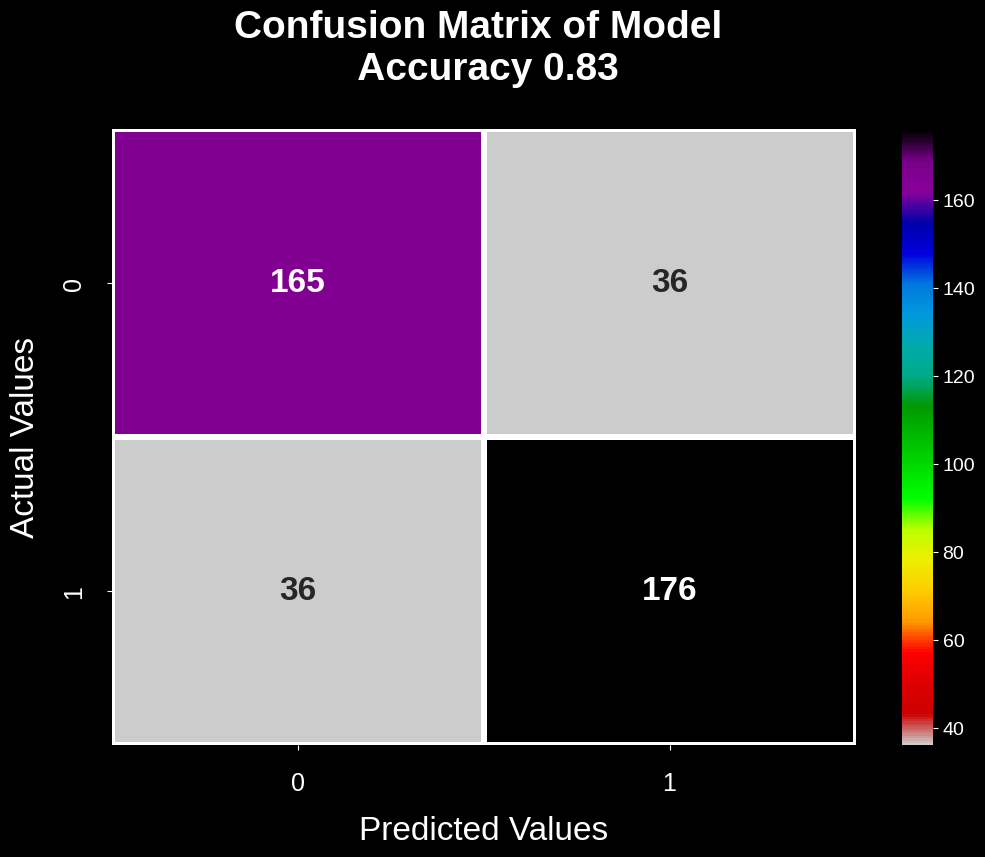

In [29]:
# Probabilities Are Rounded
y_pred = np.rint(y_pred)
confusion = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    index=range(2),columns=range(2))

# Generate Confusion Matrix
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(
        confusion, square = False, annot = True, annot_kws={'size': 24, 'weight' : 'bold'}, 
        cmap='nipy_spectral_r', linewidths=3, linecolor='white', fmt='g')


plt.tick_params(axis='both', labelsize=18, pad=15)
plt.title("Confusion Matrix of Model \n Accuracy {:.2f}".format(m_accuracy), fontweight='bold', fontsize=28, color='white', y=1.05, 
              pad=14, horizontalalignment='center')
plt.xlabel("Predicted Values", fontsize=24, color='white', labelpad=15)
plt.ylabel("Actual Values", fontsize=24, color='white', labelpad=15)
plt.show()

The confusion matrix demonstrates the model having an overall accuracy of 82.5% with 341 (165 + 176) accurate predictions and 72 (36 + 36) erroneous predictions.

# Part V: Summary & Recommendations

<a id="#PartE"></a>
## <span style="color:green">E: Trained Network Code</span>

In [30]:
# Save Model & Notify When Successfully Saved
model_file_name = "Data/Task_2_Model.h5"
model.save(model_file_name)
print(f"Model Successfully Saved As {model_file_name}")

Model Successfully Saved As Data/Task_2_Model.h5


<a id="#PartF"></a>
## <span style="color:green">F: Network Functionality</span>

The neural network displayed here exhibits a satisfactory degree of proficiency in undertaking the sentiment analysis it was commissioned with. It garners an accuracy of 83% on the test set, a figure which is undeniably commendable. However, it manifests a loss value that surpasses my preference, hovering around 0.61, suggesting that the confidence in its predictions is not as robust as I would prefer. 

This uncertainty is reflected in the model's inferior precision, notably underperforming when tasked with successfully predicting a customer's displeasure with a product or service. Such a performance signals many opportunities for enhancement within the model. Nonetheless, considering the limitations of the available hardware to operate a more sophisticated neural network, I assert that this constitutes a robust initiation. Nonetheless, despite certain shortfalls, I conclude the undertaking of sentiment analysis a successful endeavor. 

<a id="#PartG"></a>
## <span style="color:green">G: Proposed Future Actions</span>

Several intriguing trajectories emanate from this sentiment analysis meriting further exploration. A compelling proposition would be to advance this research by utilizing a significantly more potent computational system, thereby enabling the deployment of complex network layers, with the ultimate objective of crafting a more efficacious model. 

A meticulous curation and purification of the dataset, aimed at eliminating non-English languages whilst preserving prevalent technical slang, could significantly enrich an analysis whilst abbreviating the duration of data preparation. 

Ultimately, investing further efforts in formulating iterative code integrated with conditions for data preprocessing would be beneficial for automating the preliminary stages of the analysis, enabling a concentrated focus on model validation. An enhanced sentiment analysis would subsequently facilitate the inception of additional projects, such as the construction of a proficient recommendation system, as propounded at the commencement of this exposition.

# Part VI: Reporting

<a id="#PartH"></a>
## <span style="color:green">H: Reporting</span>

The entire assigment has been completed using Jupyter Notebook. Both a .pdf (PDF) and .ipynb (Jupyter Notebook) file will be included in the task submission.

<a id="#PartI"></a>
## <span style="color:green">I: Code References</span>

```
Save, serialize, and export models. (n.d.). TensorFlow. 
    https://www.tensorflow.org/guide/keras/serialization_and_saving

Adhimjatikusuma. (2023). Sentiment Analysis on Restaurant Review - h5 Model. Kaggle. 
    https://www.kaggle.com/code/adhimjatikusuma/sentiment-analysis-on-restaurant-review-h5-model
```

<a id="#PartJ"></a>
## <span style="color:green">J: Source References</span>

```
Kotzias,Dimitrios. (2015). Sentiment Labelled Sentences. UCI Machine Learning Repository. 
    https://doi.org/10.24432/C57604.

Kirenz, J. (2022, June 16). Text Mining and Sentiment Analysis with NLTK and pandas in Python | Jan Kirenz. Jan Kirenz. 
    https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-
    pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

GeeksforGeeks. (2023b). Amazon Product Review Sentiment Analysis using RNN. GeeksforGeeks. 
    https://www.geeksforgeeks.org/amazon-product-review-sentiment-analysis-using-rnn/

Kaur, J. (2023, June 29). NLP for Sentiment Analysis in Customer Feedback. XenonStack. 
    https://www.xenonstack.com/blog/nlp-for-sentiment-analysis

```